# MIS780 Advanced AI For Business - Assignment 2 - T2 2023

## Task 1: Real estate analytics with tabular data

**Student Name:** Aman Rajput

**Student ID:** 221069377

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary


In the realm of real estate, the need for accurate pricing is paramount. Buyers yearn for insights into the justifiable worth of homes they're eyeing, while sellers strive to pinpoint competitive price points that promise optimal returns. Equally vital are the efforts of real estate professionals, dedicated to delivering precise pricing recommendations. Within the real estate landscape, data-driven insights wield transformative influence. This underscores the immense value of a dependable house price prediction model.


This report is centered on a critical business challenge: predicting house prices in King County, USA. Here, we scrutinize a dataset comprising comprehensive details of more than 21,613 home sales (*Section 2*). This treasure trove of information encompasses factors like square footage, location, bedroom count, and most notably, house prices. The goal is to harness data analytics and ML to empower stakeholders, including buyers, sellers, and real estate professionals, with accurate and actionable insights. Stakeholders in the real estate industry benefit from data-driven insights that enhance their ability to make informed decisions, driving efficiency and success.

<br>

The report consists of following models to tackle different tasks:

- **Regression Models (Linear Regression vs. Neural Networks):**
In the first scenario, the models focus on estimating house prices accurately (*Section 3 Part A*).

- **Classification Models (Neural Networks vs. XGBoost):**
The second scenario involves classifying houses into "High_Price" and "Low_Price" categories based on price. The evaluation focuses on two classification models: Neural Networks and XGBoost (*Section 3 Part B*).
<br>

The models' complexity increases as they move from linear/XGB to NN and in order to assess the practicality of these models, following technical metrics are connected with business solutions: MSE, MAE, R-squared (training and validation), classification reports, confusion matrix and the Kappa Score.

<br>

Part (A) and business implication

For the first part, the estimation of house prices, both the Linear Regression and Neural Network models are evaluated for their performance. The results indicate that the Neural Network model outshines the Linear Regression model in multiple aspects. The Neural Network yields a notably lower Mean Squared Error (MSE) and Mean Absolute Error (MAE) compared to the Linear Regression model, implying more accurate predictions and a closer alignment with actual house prices (*Section 4 Part A*). These results suggest that the Neural Network's intricate architecture excels in capturing complex relationships within the data, resulting in more precise house price estimations. Furthermore, the correlation coefficients between true and predicted values for both models reinforce their reliability, with the Neural Network exhibiting a notably higher correlation of 0.939, further underscoring its effectiveness in addressing the crucial business challenge of house price estimation. This superior predictive accuracy is pivotal for stakeholders in the real estate industry, enhancing their ability to make informed pricing decisions and ultimately optimizing returns.

<br>

Part (B) and business implication

For second scenario, the XGBoost and Neural Network classification models exhibit exceptional performance in categorizing houses into "High Price" and "Low Price" groups. Both models achieve an impressive accuracy of approximately 91%, highlighting their ability to correctly classify houses based on their price categories in the validation dataset (*Section 4 Part B*). Additionally, both models demonstrate substantial agreement between their predictions and the actual classifications, as indicated by Kappa Scores of 0.811 for XGBoost and 0.815 for the Neural Network. The classification reports further emphasize their effectiveness, with high precision, recall, and F1-scores for both price categories. These robust classification models empower real estate professionals and stakeholders in King County, USA, providing them with the means to make well-informed decisions and tailored strategies to navigate the dynamic real estate market successfully.


<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In [ ]:
#Importing all the necesarry libraries and modules

import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

### Part (A)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
ames_data = pd.read_csv("/content/Part1_house_price.csv")
ames_data.set_index('id', inplace=True)
ames_data.head()
#print('Number of records read: ', ames_data_org.size)

# Finding column types
ames_data.dtypes

# Identification of missing values
missing = ames_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

#No missing values were found in the dataset but need to drop irrelavent attributes which are not really numerical
ames_data = ames_data.drop(['date','lat','long'], axis=1)

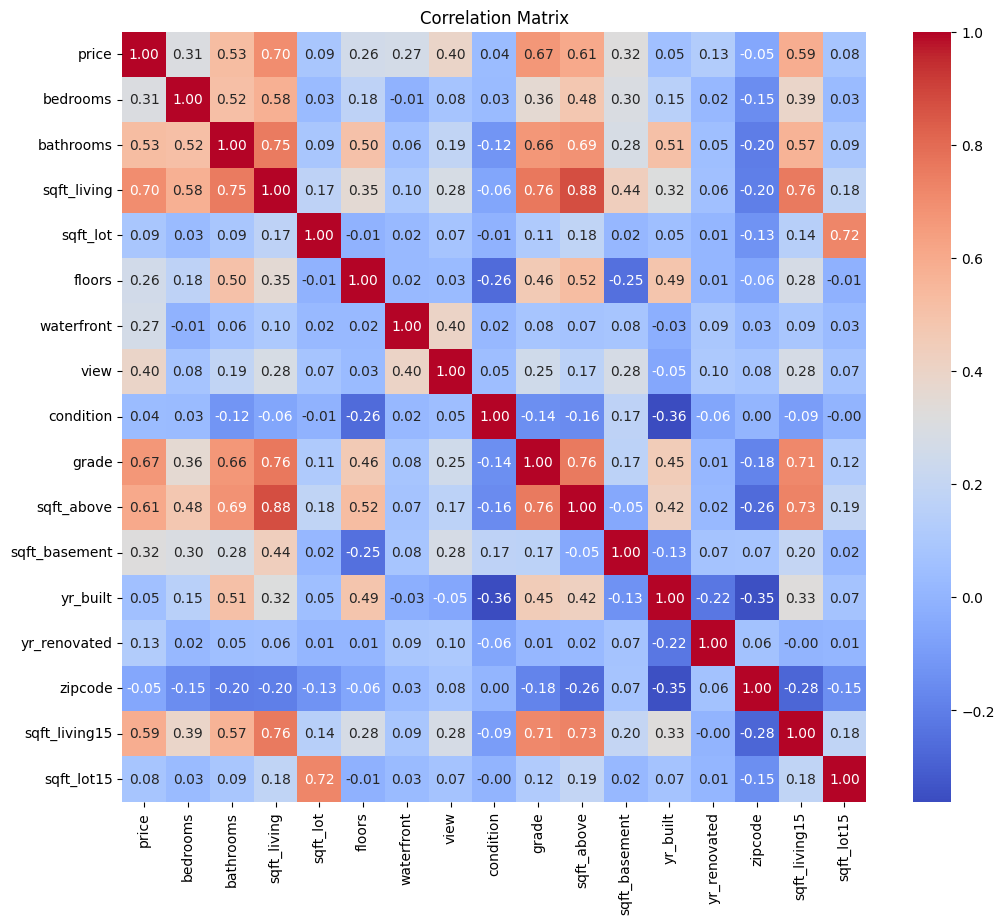

price - sqft_living: 0.70
bathrooms - sqft_living: 0.75
sqft_living - grade: 0.76
sqft_living - sqft_above: 0.88
sqft_living - sqft_living15: 0.76
sqft_lot - sqft_lot15: 0.72
grade - sqft_above: 0.76
grade - sqft_living15: 0.71
sqft_above - sqft_living15: 0.73


In [ ]:
# Generate a correlation matrix
correlation_matrix = ames_data.corr()

# Creating a heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Identify attributes with high correlation
threshold = 0.7
high_corr_pairs = np.where(np.abs(correlation_matrix) > threshold)

# Print pairs of attributes with high correlation
for i, j in zip(*high_corr_pairs):
    if i != j and i < j:
        print(f"{ames_data.columns[i]} - {ames_data.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")


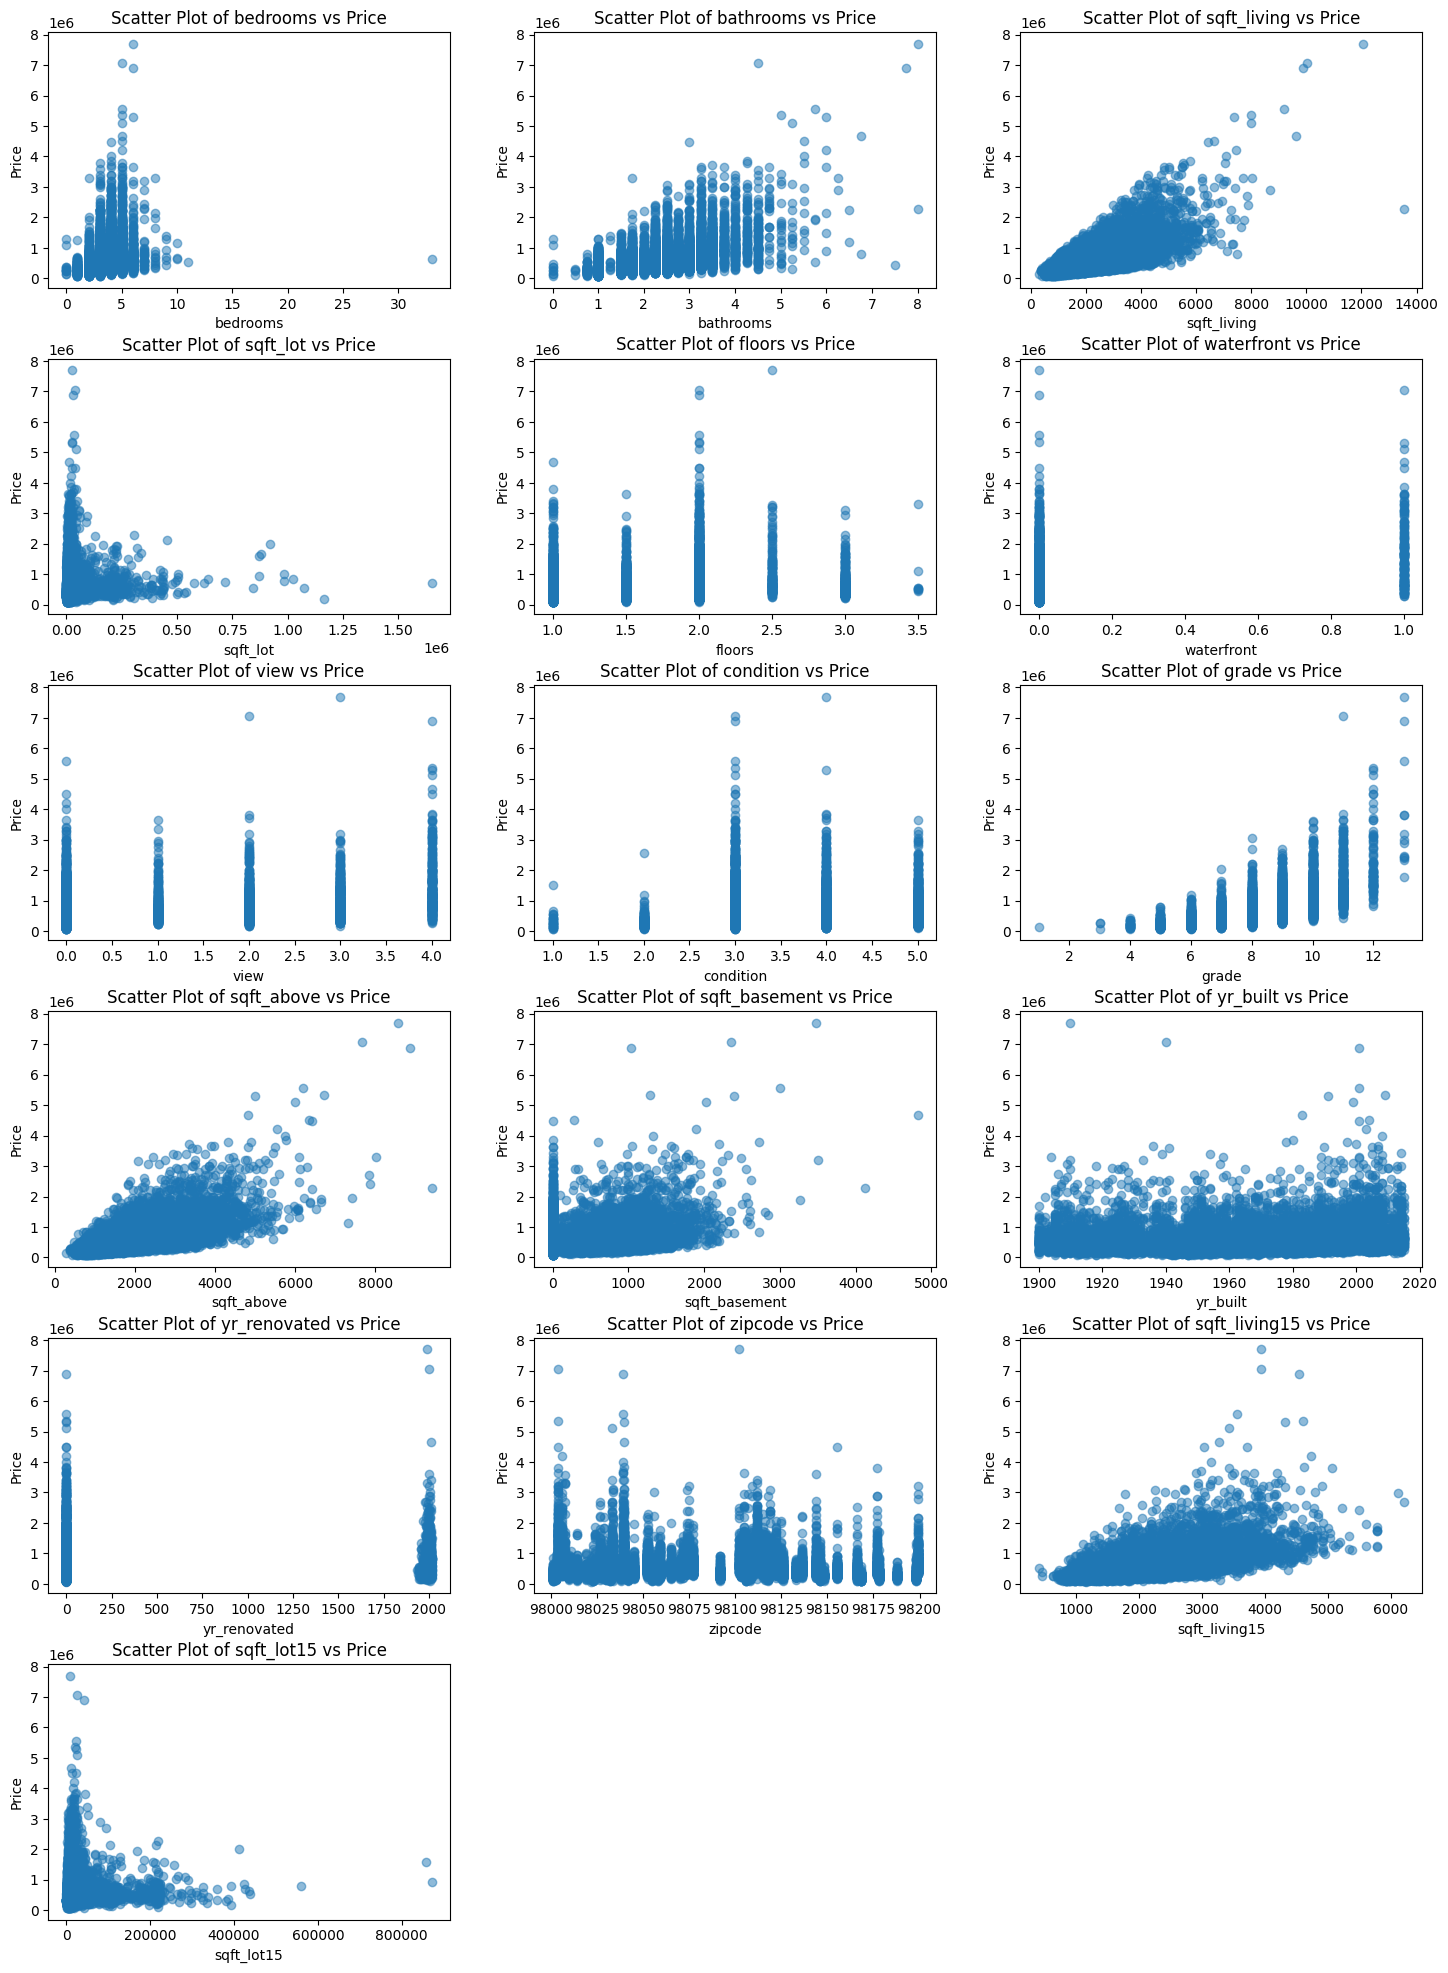

In [ ]:
# List of features
features = ames_data.columns.tolist()
features.remove('price')  # Remove the target label

# Determine the number of rows and columns for the grid
num_features = len(features)
num_cols = 3                                   # Number of columns in the grid
num_rows = int(np.ceil(num_features / num_cols))  # Number of rows in the grid

# Create scatter plots for linearity check
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.tight_layout(pad=3.0)

for idx, feature in enumerate(features):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[row_idx, col_idx]

    ax.scatter(ames_data[feature], ames_data['price'], alpha=0.5)
    ax.set_title(f"Scatter Plot of {feature} vs Price")
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

# Remove any empty subplots
for i in range(num_features, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row_idx, col_idx])

plt.show()


In [ ]:
#Chose to keep the attributes as it hardly contributed to the perfomance of the models
#ames_data = ames_data.drop(['sqft_above','sqft_living15','sqft_lot15'], axis=1)

We can one-hot encode zipcodes as homes in more desirable zip codes tend to have higher values than homes in less desirable ones. (Bonsor and Strickland 2008)

In [ ]:
# Select numerical features from the ames_data DataFrame
ames_data_num = ames_data.select_dtypes(include='number')

# One-hot encoding the 'zipcode' column because the property prices usually varies as per the locality in real  life
ames_data_zip = pd.get_dummies(ames_data['zipcode'], prefix='Zip')

# Concatenate numerical features and one-hot encoded zipcode columns
ames_data = pd.concat([ames_data_num, ames_data_zip], axis=1)

# Drop the original 'zipcode' column since it has been one-hot encoded
ames_data = ames_data.drop(['zipcode'], axis=1)

# Setting target variable (label)
label_col = 'price'

# Display the first 10 rows of the modified ames_data DataFrame
ames_data.head(10)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Zip_98001,Zip_98002,Zip_98003,Zip_98004,Zip_98005,Zip_98006,Zip_98007,Zip_98008,Zip_98010,Zip_98011,Zip_98014,Zip_98019,Zip_98022,Zip_98023,Zip_98024,Zip_98027,Zip_98028,Zip_98029,Zip_98030,Zip_98031,Zip_98032,Zip_98033,Zip_98034,Zip_98038,Zip_98039,Zip_98040,Zip_98042,Zip_98045,Zip_98052,Zip_98053,Zip_98055,Zip_98056,Zip_98058,Zip_98059,Zip_98065,Zip_98070,Zip_98072,Zip_98074,Zip_98075,Zip_98077,Zip_98092,Zip_98102,Zip_98103,Zip_98105,Zip_98106,Zip_98107,Zip_98108,Zip_98109,Zip_98112,Zip_98115,Zip_98116,Zip_98117,Zip_98118,Zip_98119,Zip_98122,Zip_98125,Zip_98126,Zip_98133,Zip_98136,Zip_98144,Zip_98146,Zip_98148,Zip_98155,Zip_98166,Zip_98168,Zip_98177,Zip_98178,Zip_98188,Zip_98198,Zip_98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Split the Ames housing data into training and validation sets.
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
ames_train, ames_valid = train_test_split(ames_data,
                                      test_size=valid_size,
                                      random_state=2020)

# Get the target and features for the training and validation sets.
ames_y_train = ames_train[[label_col]]
ames_x_train = ames_train.drop(label_col, axis=1)
ames_y_valid = ames_valid[[label_col]]
ames_x_valid = ames_valid.drop(label_col, axis=1)

print('Size of training set: ', len(ames_x_train))
print('Size of validation set: ', len(ames_x_valid))

Size of training set:  15129
Size of validation set:  6484


In [ ]:
# Impute missing values in the training and validation sets using the mean.
#(Not necessary as no missing values, but logical to keep the code if model is trained on new data)
print('Missing training values before imputation = ', ames_x_train.isnull().sum().sum())
print('Missing validation values before imputation = ', ames_x_valid.isnull().sum().sum())

imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(ames_x_train)
ames_x_train = pd.DataFrame(imputer.transform(ames_x_train),
                            columns = ames_x_train.columns, index = ames_x_train.index)
ames_x_valid = pd.DataFrame(imputer.transform(ames_x_valid),
                            columns = ames_x_valid.columns, index = ames_x_valid.index)

print('Missing training values after imputation = ', ames_x_train.isnull().sum().sum())
print('Missing validation values after imputation = ', ames_x_valid.isnull().sum().sum())

Missing training values before imputation =  0
Missing validation values before imputation =  0
Missing training values after imputation =  0
Missing validation values after imputation =  0


In [ ]:
# Scale the features in the training and validation sets to the range [0, 1].
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(ames_x_train)
ames_x_train = pd.DataFrame(scaler.transform(ames_x_train),
                            columns = ames_x_train.columns, index = ames_x_train.index)
ames_x_valid = pd.DataFrame(scaler.transform(ames_x_valid),
                            columns = ames_x_valid.columns, index = ames_x_valid.index)

print('X train min =', round(ames_x_train.min().min(),4), '; max =', round(ames_x_train.max().max(), 4))
print('X valid min =', round(ames_x_valid.min().min(),4), '; max =', round(ames_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.0 ; max = 1.1671


In [ ]:
ames_x_valid.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Zip_98001,Zip_98002,Zip_98003,Zip_98004,Zip_98005,Zip_98006,Zip_98007,Zip_98008,Zip_98010,Zip_98011,Zip_98014,Zip_98019,Zip_98022,Zip_98023,Zip_98024,Zip_98027,Zip_98028,Zip_98029,Zip_98030,Zip_98031,Zip_98032,Zip_98033,Zip_98034,Zip_98038,Zip_98039,Zip_98040,Zip_98042,Zip_98045,Zip_98052,Zip_98053,Zip_98055,Zip_98056,Zip_98058,Zip_98059,Zip_98065,Zip_98070,Zip_98072,Zip_98074,Zip_98075,Zip_98077,Zip_98092,Zip_98102,Zip_98103,Zip_98105,Zip_98106,Zip_98107,Zip_98108,Zip_98109,Zip_98112,Zip_98115,Zip_98116,Zip_98117,Zip_98118,Zip_98119,Zip_98122,Zip_98125,Zip_98126,Zip_98133,Zip_98136,Zip_98144,Zip_98146,Zip_98148,Zip_98155,Zip_98166,Zip_98168,Zip_98177,Zip_98178,Zip_98188,Zip_98198,Zip_98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5089700260,0.121212,0.28125,0.136604,0.004561,0.4,0.0,0.0,0.50,0.583333,0.198465,0.000000,0.678261,0.000000,0.308209,0.008087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1523049188,0.060606,0.12500,0.030943,0.011879,0.0,0.0,0.0,0.50,0.416667,0.044956,0.000000,0.426087,0.000000,0.187747,0.020642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5316100106,0.090909,0.31250,0.171321,0.001866,0.4,0.0,0.0,0.50,0.666667,0.199561,0.108959,0.582609,0.994045,0.394252,0.004756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624049103,0.060606,0.12500,0.072453,0.002457,0.0,0.0,0.0,0.50,0.416667,0.082237,0.050847,0.217391,0.000000,0.198073,0.004985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9161100795,0.090909,0.12500,0.071698,0.003173,0.2,0.0,0.0,0.75,0.416667,0.073465,0.067797,0.086957,0.000000,0.182585,0.005847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546000875,0.090909,0.12500,0.104151,0.002111,0.2,0.0,0.0,0.75,0.500000,0.096491,0.121065,0.339130,0.000000,0.144726,0.003842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3278612450,0.090909,0.31250,0.113962,0.000363,0.4,0.0,0.0,0.50,0.583333,0.165570,0.000000,0.965217,0.000000,0.241094,0.001976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2064800880,0.090909,0.12500,0.084528,0.004179,0.0,0.0,0.0,0.50,0.500000,0.083333,0.087167,0.600000,0.000000,0.241094,0.008432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Part B

- The code first creates two new columns in the 'ames_data' DataFrame, namely 'High_Price' and 'Low_Price'. These columns will serve as labels for the classification task.

- For each row in the DataFrame, the 'High_Price' column is assigned a value of 1 if the corresponding 'price' is greater than or equal to $450,000; otherwise, it is assigned a value of 0. This effectively creates a binary classification where 1 represents houses with a high price and 0 represents houses with a low price.

- Similarly, the 'Low_Price' column is assigned a value of 1 if the 'price' is less than $450,000; otherwise, it is assigned a value of 0.

In [ ]:
# Convert price to nominal categories to one-hot encode
ames_data['High_Price'] = np.where(ames_data['price'] >= 450000, 1, 0)
ames_data['Low_Price'] = np.where(ames_data['price'] < 450000, 1, 0)

# Drop the 'price' column from ames_data and reassign
ames_data = ames_data.drop(['price'], axis=1)
ames_data.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Zip_98001,Zip_98002,Zip_98003,Zip_98004,Zip_98005,Zip_98006,Zip_98007,Zip_98008,Zip_98010,Zip_98011,Zip_98014,Zip_98019,Zip_98022,Zip_98023,Zip_98024,Zip_98027,Zip_98028,Zip_98029,Zip_98030,Zip_98031,Zip_98032,Zip_98033,Zip_98034,Zip_98038,Zip_98039,Zip_98040,Zip_98042,Zip_98045,Zip_98052,Zip_98053,Zip_98055,Zip_98056,Zip_98058,Zip_98059,Zip_98065,Zip_98070,Zip_98072,Zip_98074,Zip_98075,Zip_98077,Zip_98092,Zip_98102,Zip_98103,Zip_98105,Zip_98106,Zip_98107,Zip_98108,Zip_98109,Zip_98112,Zip_98115,Zip_98116,Zip_98117,Zip_98118,Zip_98119,Zip_98122,Zip_98125,Zip_98126,Zip_98133,Zip_98136,Zip_98144,Zip_98146,Zip_98148,Zip_98155,Zip_98166,Zip_98168,Zip_98177,Zip_98178,Zip_98188,Zip_98198,Zip_98199,High_Price,Low_Price
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
label_cols = ['High_Price', 'Low_Price']  # Use the new columns as target labels

train_size, valid_size, test_size = (0.7, 0.3, 0.0)
ames_train2, ames_valid2 = train_test_split(ames_data,
                                         test_size=valid_size,
                                         random_state=2020)

ames_x_train2 = ames_train2.drop(label_cols, axis=1)  # Drop the target columns
ames_y_train2 = ames_train2[label_cols]
ames_x_valid2 = ames_valid2.drop(label_cols, axis=1)  # Drop the target columns
ames_y_valid2 = ames_valid2[label_cols]

In [ ]:
#The following imputation is not necesarry for this particular data but maybe useful for a new dataset

print('Size of training set: ', len(ames_x_train2))
print('Size of validation set: ', len(ames_x_valid2))

imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(ames_x_train2)
ames_x_train2 = pd.DataFrame(imputer.transform(ames_x_train2),
                             columns=ames_x_train2.columns, index=ames_x_train2.index)
ames_x_valid2 = pd.DataFrame(imputer.transform(ames_x_valid2),
                             columns=ames_x_valid2.columns, index=ames_x_valid2.index)
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(ames_x_train2)
ames_x_train2 = pd.DataFrame(scaler.transform(ames_x_train2),
                             columns=ames_x_train2.columns, index=ames_x_train2.index)
ames_x_valid2 = pd.DataFrame(scaler.transform(ames_x_valid2),
                             columns=ames_x_valid2.columns, index=ames_x_valid2.index)

print('X train min =', round(ames_x_train2.min().min(), 4), '; max =', round(ames_x_train2.max().max(), 4))
print('X valid min =', round(ames_x_valid2.min().min(), 4), '; max =', round(ames_x_valid2.max().max(), 4))


Size of training set:  15129
Size of validation set:  6484
X train min = 0.0 ; max = 1.0
X valid min = -0.0 ; max = 1.1671


In [ ]:
#Creating arrays
arr_x_train2 = np.array(ames_x_train2)
arr_y_train2 = np.array(ames_y_train2)
arr_x_valid2 = np.array(ames_x_valid2)
arr_y_valid2 = np.array(ames_y_valid2)

print('Training shape:', arr_x_train2.shape)
print('Training samples: ', arr_x_train2.shape[0])
print('Validation samples: ', arr_x_valid2.shape[0])

Training shape: (15129, 85)
Training samples:  15129
Validation samples:  6484


In [ ]:
ames_x_valid2.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Zip_98001,Zip_98002,Zip_98003,Zip_98004,Zip_98005,Zip_98006,Zip_98007,Zip_98008,Zip_98010,Zip_98011,Zip_98014,Zip_98019,Zip_98022,Zip_98023,Zip_98024,Zip_98027,Zip_98028,Zip_98029,Zip_98030,Zip_98031,Zip_98032,Zip_98033,Zip_98034,Zip_98038,Zip_98039,Zip_98040,Zip_98042,Zip_98045,Zip_98052,Zip_98053,Zip_98055,Zip_98056,Zip_98058,Zip_98059,Zip_98065,Zip_98070,Zip_98072,Zip_98074,Zip_98075,Zip_98077,Zip_98092,Zip_98102,Zip_98103,Zip_98105,Zip_98106,Zip_98107,Zip_98108,Zip_98109,Zip_98112,Zip_98115,Zip_98116,Zip_98117,Zip_98118,Zip_98119,Zip_98122,Zip_98125,Zip_98126,Zip_98133,Zip_98136,Zip_98144,Zip_98146,Zip_98148,Zip_98155,Zip_98166,Zip_98168,Zip_98177,Zip_98178,Zip_98188,Zip_98198,Zip_98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5089700260,0.121212,0.28125,0.136604,0.004561,0.4,0.0,0.0,0.50,0.583333,0.198465,0.000000,0.678261,0.000000,0.308209,0.008087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1523049188,0.060606,0.12500,0.030943,0.011879,0.0,0.0,0.0,0.50,0.416667,0.044956,0.000000,0.426087,0.000000,0.187747,0.020642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5316100106,0.090909,0.31250,0.171321,0.001866,0.4,0.0,0.0,0.50,0.666667,0.199561,0.108959,0.582609,0.994045,0.394252,0.004756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624049103,0.060606,0.12500,0.072453,0.002457,0.0,0.0,0.0,0.50,0.416667,0.082237,0.050847,0.217391,0.000000,0.198073,0.004985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9161100795,0.090909,0.12500,0.071698,0.003173,0.2,0.0,0.0,0.75,0.416667,0.073465,0.067797,0.086957,0.000000,0.182585,0.005847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546000875,0.090909,0.12500,0.104151,0.002111,0.2,0.0,0.0,0.75,0.500000,0.096491,0.121065,0.339130,0.000000,0.144726,0.003842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3278612450,0.090909,0.31250,0.113962,0.000363,0.4,0.0,0.0,0.50,0.583333,0.165570,0.000000,0.965217,0.000000,0.241094,0.001976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2064800880,0.090909,0.12500,0.084528,0.004179,0.0,0.0,0.0,0.50,0.500000,0.083333,0.087167,0.600000,0.000000,0.241094,0.008432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

<a id = "cell_model"></a>
## 3. Predictive Modeling

In [ ]:
!pip install keras-tuner
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Nadam
from kerastuner.tuners import RandomSearch
import xgboost as xgb
from xgboost import XGBClassifier
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


###Part (A)

####Linear Regression Model


The impact of this model on performance lies in its simplicity and ease of interpretation. It provides a baseline for regression tasks, and its performance metrics (R-squared, MSE, and MAE) serve as benchmarks for evaluating more complex models. While linear regression may not capture complex nonlinear relationships, it remains a valuable tool for understanding linear dependencies between features and target variables in real estate analytics.

In [ ]:
#### Linear regression model ####

linear_model = LinearRegression()
linear_model.fit(ames_x_train, ames_y_train)

# Evaluate the linear regression model on the validation set
linear_r2_train = linear_model.score(ames_x_train, ames_y_train)
linear_r2_valid = linear_model.score(ames_x_valid, ames_y_valid)
linear_predictions = linear_model.predict(ames_x_valid)

mse_linear = mean_squared_error(ames_y_valid, linear_predictions)
mae_linear = mean_absolute_error(ames_y_valid, linear_predictions)

#### Neural Network Model

This neural network model, referred to as "Neural Network Model" is designed as a basic feedforward neural network with two hidden layers. It focuses on simplicity and efficiency while allowing customization of key hyperparameters for optimization. The dropout rate helps prevent overfitting, and the learning rate can be fine-tuned for optimal convergence. While it may not be as complex as deep neural networks, it offers a practical and straightforward approach for regression tasks where simplicity and speed are essential.

In [ ]:
#### Neural network model ####

# Convert datasets to arrays
arr_x_train = np.array(ames_x_train)
arr_y_train = np.array(ames_y_train)
arr_x_valid = np.array(ames_x_valid)
arr_y_valid = np.array(ames_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (15129, 85)
Training samples:  15129
Validation samples:  6484


In [ ]:
# Basic neural network model with two hidden layers

def model(x_size, y_size, hidden_units=(100, 180, 20), activation=('tanh', 'relu', 'relu'),
                          dropout_rate=0.2, learning_rate=0.005):
    t_model = Sequential()

    for i in range(len(hidden_units)):
        t_model.add(Dense(hidden_units[i], activation=activation[i], input_shape=(x_size,)))
        if dropout_rate > 0 and i != len(hidden_units) - 1:
            t_model.add(Dropout(dropout_rate))

    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=Nadam(learning_rate=learning_rate),
        metrics=[metrics.mae])

    return t_model

# Creating a neural network model and train it on the training set.

neural_network_params = {
    'hidden_units': (100, 180, 20),
    'activation': ('tanh', 'relu', 'relu'),
    'dropout_rate': 0.2,
    'learning_rate': 0.005
}

model = model(arr_x_train.shape[1], arr_y_train.shape[1], **neural_network_params)
model.summary()

history = model.fit(
    arr_x_train, arr_y_train,
    batch_size=64,
    epochs=200,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               8600      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 180)               18180     
                                                                 
 dropout_3 (Dropout)         (None, 180)               0         
                                                                 
 dense_6 (Dense)             (None, 20)                3620      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 30,421
Trainable params: 30,421
Non-trai

In [ ]:
# Evaluate the neural network model on the validation set

neural_predictions = model.predict(arr_x_valid)
neural_mse = mean_squared_error(arr_y_valid, neural_predictions)
neural_mae = mean_absolute_error(arr_y_valid, neural_predictions)
neural_predictions_train = model.predict(arr_x_train)
neural_r2_train = r2_score(arr_y_train, neural_predictions_train)
neural_r2_valid = r2_score(arr_y_valid, neural_predictions)

473/473 [==============================] - 1s 3ms/step


### Part (B)

####Neural Network Model 2

This neural network model, referred to as "Neural Network Model 2," is designed for hyperparameter tuning and optimization. It utilizes the Keras Tuner library to search for the best combination of hyperparameters that yield optimal performance. The impact of this model architecture on performance is significant; by dynamically adjusting hyperparameters, it allows the model to adapt to the complexity of the data and achieve superior performance compared to manually predefined architectures. The neural network's depth and width are optimized to capture the underlying patterns in the data, leading to improved predictive accuracy and reduced overfitting. This approach enhances the model's robustness and generalization capability, making it a powerful tool for various regression tasks. This model basically experiments different parameters for us and deliver the best model.

In [ ]:
#### Neural Netwrok Model 2 ####

#This model is an advanced neural network

def build_model(hp):
    input_layer = Input(shape=(arr_x_train2.shape[1],))
    x = input_layer

    # Hyperparameter: Number of hidden layers
    num_hidden_layers = hp.Int('num_hidden_layers', min_value=1, max_value=3, step=1)

    for _ in range(num_hidden_layers):
        # Hyperparameter: Number of units in each hidden layer
        num_units = hp.Int('num_units', min_value=32, max_value=256, step=32)
        x = Dense(num_units, activation='relu')(x)

        # Hyperparameter: Dropout rate
        dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
        x = Dropout(dropout_rate)(x)

    output_layer = Dense(arr_y_train2.shape[1])(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    # Hyperparameter: Learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = Nadam(learning_rate=learning_rate)

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

# Create a RandomSearch tuner for hyperparameter optimization
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=2,
    executions_per_trial=2,
    directory='my_dir',
    project_name='neural_net_hyperopt')

# Search for the best hyperparameters
tuner.search(arr_x_train2, arr_y_train2, epochs=50, validation_data=(arr_x_valid2, arr_y_valid2))

# Get the best model architecture
model2 = tuner.get_best_models(num_models=1)[0]
model2.summary()

history2 = model2.fit(arr_x_train2, arr_y_train2,
                     batch_size=32,
                     epochs=100,
                     shuffle=True,
                     verbose=2,
                     validation_data=(arr_x_valid2, arr_y_valid2))


Trial 2 Complete [00h 02m 24s]
val_loss: 0.0703633688390255

Best val_loss So Far: 0.06649258732795715
Total elapsed time: 00h 05m 00s
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 85)]              0         
                                                                 
 dense (Dense)               (None, 32)                2752      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                105

In [ ]:
# Evaluate the neural network model on the validation set

neural_predictions2 = model2.predict(arr_x_valid2)
neural_mse2 = mean_squared_error(arr_y_valid2, neural_predictions2)
neural_mae2 = mean_absolute_error(arr_y_valid2, neural_predictions2)
neural_predictions_train2 = model2.predict(arr_x_train2)
neural_r2_train2 = r2_score(arr_y_train2, neural_predictions_train2)
neural_r2_valid2 = r2_score(arr_y_valid2, neural_predictions2)

473/473 [==============================] - 1s 2ms/step


In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

#### XGBoost Model

The XGBoost model, short for Extreme Gradient Boosting, is a powerful ensemble learning algorithm known for its efficiency and effectiveness in both classification and regression tasks. The choice of hyperparameters can significantly impact model performance, making it essential to conduct hyperparameter tuning for optimal results. The model uses the XGBoostClassifier from the XGBoost library, and is also configured for binary classification with the 'binary:logistic' objective, indicating logistic regression for binary classification.


In [ ]:
#### XGBoost Model ####

# Convert datasets to arrays
arr_x_train2 = np.array(ames_x_train2)
arr_y_train2 = np.array(ames_y_train2)
arr_x_valid2 = np.array(ames_x_valid2)
arr_y_valid2 = np.array(ames_y_valid2)

# Create XGBoost classification model
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # Use binary classification objective
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=2020
)

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(arr_x_train2, arr_y_train2)
xgb_predictions = xgb_model.predict(arr_x_valid2)

# Evaluate the neural network model on the validation set
train_score_xgb = xgb_model.score(arr_x_train2, arr_y_train2)
valid_score_xgb = xgb_model.score(arr_x_valid2, arr_y_valid2)

xgb_mse = mean_squared_error(arr_y_valid2, xgb_predictions)
xgb_mae = mean_absolute_error(arr_y_valid2, xgb_predictions)


<a id = "cell_report"></a>
## 4. Experiments Report

###Part (A)

In the context of addressing the business problem of predicting house prices in King County, USA, an in-depth model evaluation is conducted. The primary objective is to determine which regression model, either linear regression or neural networks, offers better estimation performance for house prices.


1. **Mean Squared Error (MSE):** The evaluation revealed that the Neural Network model outperforms the Linear Regression model in terms of MSE. This indicates that the Neural Network's predictions are consistently closer to the actual house prices, a crucial factor from a business perspective where accurate predictions are pivotal for informed decision-making.

2. **Mean Absolute Error (MAE):** The Neural Network model also boasts a lower MAE compared to the Linear Regression model. This signifies that, on average, the Neural Network's predictions closely align with the true house prices, aligning with the business goal of minimizing prediction errors.

3. **R-squared (Train):** The R-squared value for the Neural Network on the training data (0.93) is higher than that of the Linear Regression model (0.81), suggesting that the Neural Network captures a higher proportion of the variance in the target variable.

4. **R-squared (Validation):** The R-squared value for the Neural Network on the validation data (0.88) is also higher than that of the Linear Regression model (0.8), indicating that the Neural Network performs better in explaining the variation in the validation dataset.


The results suggest that the Neural Network's complex architecture allows it to capture nonlinear relationships within the data, leading to improved predictions. The higher R-squared values suggest that the Neural Network better explains the variability in the target variable compared to the Linear Regression model. However, it's important to note that while the Neural Network shows promising results, its complexity may require careful consideration in terms of computational resources and potential overfitting.

In conclusion, the Neural Network model emerges as the optimal choice due to its superior predictive accuracy and aptitude for capturing intricate patterns. Its ability to address the nonlinearity inherent in house price prediction aligns with the complexities of real-world housing markets, making it more suitable for tackling this particular business challenge compared to the Linear Regression model.

In [ ]:
from tabulate import tabulate

# Linear Regression Model Evaluation:
linear_results = [
    ["Linear Regression Mean Squared Error", mse_linear],
    ["Linear Regression Mean Absolute Error", mae_linear],
    ["Linear Regression R-squared (Train)", round(linear_r2_train.item(), 2)],
    ["Linear Regression R-squared (Validation)", round(linear_r2_valid.item(), 2)]
]

# Neural Network Model Evaluation:
neural_results = [
    ["Neural Network Mean Squared Error", neural_mse],
    ["Neural Network Mean Absolute Error", neural_mae],
    ["Neural Network R-squared (Train)", round(neural_r2_train, 2)],
    ["Neural Network R-squared (Validation)", round(neural_r2_valid, 2)]
]

# Results in tabular form
print("Linear Regression Model Results:")
print(tabulate(linear_results, headers=["Metric", "Value"], tablefmt="grid"))
print("\nNeural Network Model Results:")
print(tabulate(neural_results, headers=["Metric", "Value"], tablefmt="grid"))


Linear Regression Model Results:
+------------------------------------------+-----------------+
| Metric                                   |           Value |
+==========================================+=================+
| Linear Regression Mean Squared Error     |     2.72709e+10 |
+------------------------------------------+-----------------+
| Linear Regression Mean Absolute Error    | 98155.8         |
+------------------------------------------+-----------------+
| Linear Regression R-squared (Train)      |     0.81        |
+------------------------------------------+-----------------+
| Linear Regression R-squared (Validation) |     0.8         |
+------------------------------------------+-----------------+

Neural Network Model Results:
+---------------------------------------+-----------------+
| Metric                                |           Value |
+=======================================+=================+
| Neural Network Mean Squared Error     |     1.64117e+10 |
+--

The Correlation between true and predicted values for linear model is:  0.896
The Correlation between true and predicted values for neural model is:  0.939


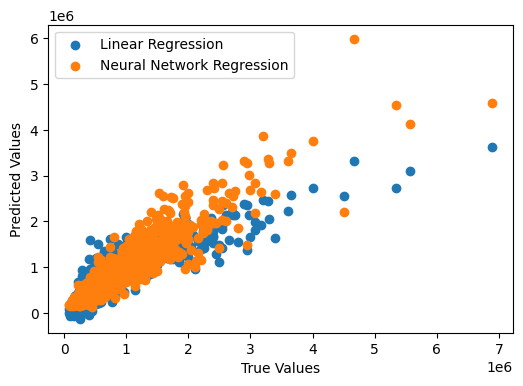

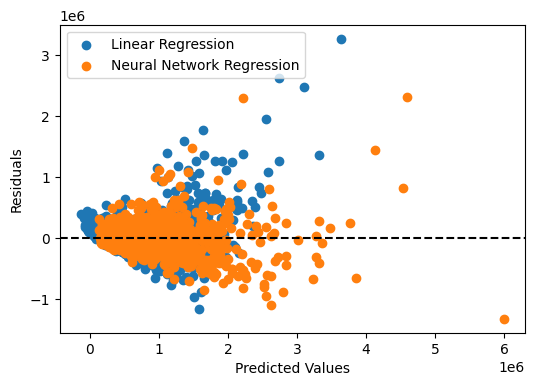

In [ ]:
# Calculate and display the correlation value between true and predicted values
corr_result = np.corrcoef(arr_y_valid.reshape(1,6484)[0], linear_predictions.reshape(1,6484)[0])
print('The Correlation between true and predicted values for linear model is: ',round(corr_result[0,1],3))
corr_result1 = np.corrcoef(arr_y_valid.reshape(1,6484)[0], neural_predictions.reshape(1,6484)[0])
print('The Correlation between true and predicted values for neural model is: ',round(corr_result1[0,1],3))

# Plot the true vs. predicted values for both models
plt.scatter(ames_y_valid, linear_predictions, label='Linear Regression')
plt.scatter(ames_y_valid, neural_predictions, label='Neural Network Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Create a residual plot for both models
plt.scatter(linear_predictions, ames_y_valid - linear_predictions, label='Linear Regression')
plt.scatter(neural_predictions, ames_y_valid - neural_predictions, label='Neural Network Regression')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


### Part (B)

In the context of addressing the second part of business problem of classifying houses as "High_Price" or "Low_Price" based on their price attribute, an extensive model evaluation is conducted using two classification models: Neural Networks and XGBoost.


1. **Mean Squared Error (MSE)**: Both models exhibit similar MSE values, suggesting comparable average prediction errors. This metric is critical for the business since a lower MSE implies higher accuracy in classifying houses, enabling informed decision-making for potential buyers and sellers.

2. **Mean Absolute Error (MAE)**: The XGBoost model outperforms the Neural Network model in terms of MAE. A lower MAE indicates that the XGBoost model's predictions are closer, on average, to the actual classification labels. This accuracy directly aligns with the business's goal of effectively categorizing houses into "High_Price" or "Low_Price" categories.

3. **R-squared (Train and Validation)**: The XGBoost model demonstrates superior R-squared values on the training set (0.95 vs. 0.78) compared to the Neural Network model. This indicates that the XGBoost model captures a larger portion of the variance in the target classification during training. While both models perform similarly on the validation set, the XGBoost model's higher R-squared on training data emphasizes its capability to capture underlying patterns, crucial for providing reliable classifications.

4. **Kappa Score**: The Kappa Score assesses the agreement between predicted and actual classifications, specifically relevant for classification tasks. The Neural Network model exhibits a slightly higher Kappa Score (0.815) than the XGBoost model (0.811). This suggests that the Neural Network model achieves better agreement between its predictions and the actual classifications, reinforcing its capability to provide accurate categorizations.

In conclusion, both models showcase comparable performance in terms of mean squared error and R-squared on the validation set. Furthermore, the confusion matrix shows that the neural netowrk was able to better classify the values even though difference was not much compared to XGBoost.

While the XGBoost model excels in terms of R-squared on the training set and has a lower mean absolute error, indicating superior individual instance prediction accuracy, the Neural Network model demonstrates a higher Kappa Score, implying better classification agreement. The analysis of these metrics provides valuable insights for businesses aiming to categorize houses effectively. The chosen model can streamline decision-making for potential buyers and sellers, enhancing the accuracy and efficiency of real estate transactions.

XGB Regression Model Results:
+--------------------------------+-----------+
| Metric                         |     Value |
+================================+===========+
| XGBoost Mean Squared Error     | 0.0943862 |
+--------------------------------+-----------+
| XGBoost Mean Absolute Error    | 0.0943862 |
+--------------------------------+-----------+
| XGBoost R-squared (Train)      | 0.95      |
+--------------------------------+-----------+
| XGBoost R-squared (Validation) | 0.91      |
+--------------------------------+-----------+
| XGBoost Kappa Score            | 0.811     |
+--------------------------------+-----------+

XGBoost Classification Report:
              precision    recall  f1-score   support

  High Price       0.92      0.90      0.91      3357
   Low Price       0.89      0.91      0.90      3127

    accuracy                           0.91      6484
   macro avg       0.91      0.91      0.91      6484
weighted avg       0.91      0.91      0.91      6484



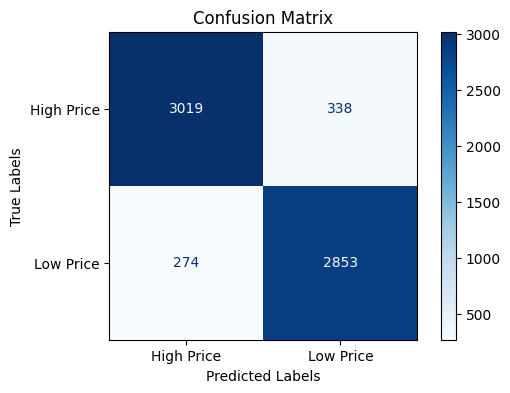


Neural Network Model Results:
+---------------------------------------+-----------+
| Metric                                |     Value |
+=======================================+===========+
| Neural Network Mean Squared Error     | 0.0689983 |
+---------------------------------------+-----------+
| Neural Network Mean Absolute Error    | 0.141631  |
+---------------------------------------+-----------+
| Neural Network R-squared (Train)      | 0.78      |
+---------------------------------------+-----------+
| Neural Network R-squared (Validation) | 0.72      |
+---------------------------------------+-----------+
| Neural Network Kappa Score            | 0.815     |
+---------------------------------------+-----------+

Neural Network Classification Report:
              precision    recall  f1-score   support

  High Price       0.92      0.90      0.91      3357
   Low Price       0.90      0.91      0.91      3127

    accuracy                           0.91      6484
   macro a

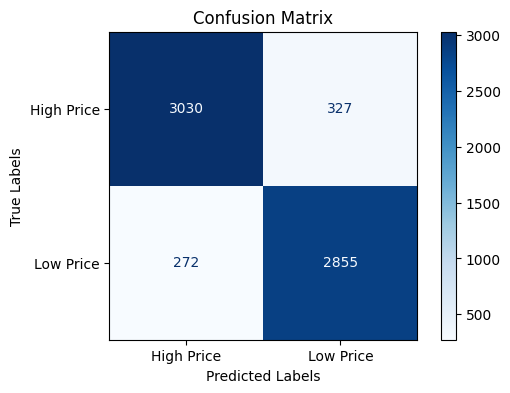

In [ ]:
# Calculate Kappa score
def calculate_kappa_score(y_true, y_pred):
    kappa = cohen_kappa_score(y_true, y_pred)
    return kappa

# Create and plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    display.plot(cmap=plt.cm.Blues, values_format=".0f")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



# Calculate Kappa score for XGBoost
xgb_kappa = calculate_kappa_score(np.argmax(arr_y_valid2, axis=1), np.argmax(xgb_predictions, axis=1))

# Generate classification report for XGBoost
xgb_classification_report = classification_report(np.argmax(arr_y_valid2, axis=1),
                                                  np.argmax(xgb_predictions, axis=1))

# Create confusion matrix for XGBoost
xgb_cm = confusion_matrix(np.argmax(arr_y_valid2, axis=1), np.argmax(xgb_predictions, axis=1))

# Neural Network Model Evaluation:
neural_predictions2_labels = np.argmax(neural_predictions2, axis=1)

# Calculate Kappa score for Neural Network
neural_kappa2 = calculate_kappa_score(np.argmax(arr_y_valid2, axis=1), neural_predictions2_labels)

# Generate classification report for Neural Network
neural_classification_report2 = classification_report(np.argmax(arr_y_valid2, axis=1), neural_predictions2_labels)

# Create confusion matrix for Neural Network
neural_cm2 = confusion_matrix(np.argmax(arr_y_valid2, axis=1), neural_predictions2_labels)

# Generate classification report for XGBoost
xgb_classification_report = classification_report(np.argmax(arr_y_valid2, axis=1),
                                                  np.argmax(xgb_predictions, axis=1), target_names=["High Price", "Low Price"])

# Generate classification report for Neural Network
neural_classification_report2 = classification_report(np.argmax(arr_y_valid2, axis=1), neural_predictions2_labels, target_names=["High Price", "Low Price"])


# Print results in tabular
XGB_results = [
    ["XGBoost Mean Squared Error", xgb_mse],
    ["XGBoost Mean Absolute Error", xgb_mae],
    ["XGBoost R-squared (Train)", round(train_score_xgb, 2)],
    ["XGBoost R-squared (Validation)", round(valid_score_xgb, 2)],
    ["XGBoost Kappa Score", round(xgb_kappa, 3)]
]

neural_results = [
    ["Neural Network Mean Squared Error", neural_mse2],
    ["Neural Network Mean Absolute Error", neural_mae2],
    ["Neural Network R-squared (Train)", round(neural_r2_train2, 2)],
    ["Neural Network R-squared (Validation)", round(neural_r2_valid2, 2)],
    ["Neural Network Kappa Score", round(neural_kappa2, 3)]
]

# Print results for XGB

print("XGB Regression Model Results:")
print(tabulate(XGB_results, headers=["Metric", "Value"], tablefmt="grid"))

# Print classification reports
print("\nXGBoost Classification Report:")
print(xgb_classification_report)

# Plot confusion matrix for XGBoost
plot_confusion_matrix(np.argmax(arr_y_valid2, axis=1), np.argmax(xgb_predictions, axis=1),
                      labels=["High Price", "Low Price"])


# Print results for Neural Network

print("\nNeural Network Model Results:")
print(tabulate(neural_results, headers=["Metric", "Value"], tablefmt="grid"))

print("\nNeural Network Classification Report:")
print(neural_classification_report2)

# Plot confusion matrix for Neural Network
plot_confusion_matrix(np.argmax(arr_y_valid2, axis=1), neural_predictions2_labels,
                      labels=["High Price", "Low Price"])



### References


 - Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. Journal of Machine Learning Research, 13(Feb), 281-305.
https://www.cambridge.org/core/journals/international-journal-of-microwave-and-wireless-technologies/article/abs/hyperparameters-optimization-of-neural-network-using-improved-particle-swarm-optimization-for-modeling-of-electromagnetic-inverse-problems/585E9C60E86F96C7DB55209C5253467D

- Hindawi 2019, A study on the influencing factors and prediction of real estate prices based on data mining and machine learning, Hindawi Limited, accessed 30 August 2023, <https://www.hindawi.com/journals/sp/2022/5750354/>.
- IEEE 2019, Predicting house prices in King County using machine learning methods, IEEE Xplore Digital Library, accessed 30 August 2023, <https://link.springer.com/article/10.1007/s00521-020-05469-3>.
- Li, L., Jamieson, K., DeSalvo, G., Rostamizadeh, A., & Talwalkar, A. (2017). Hyperband: a novel bandit-based approach to hyperparameter optimization. The Journal of Machine Learning Research, vol. 18, no. 1, pp. 6765-6816. https://arxiv.org/pdf/2205.08695.pdf

- MDPI 2020, Machine learning models for real estate price prediction: a comparative analysis, MDPI AG, accessed 30 August 2023, <https://www.mdpi.com/2076-3417/10/17/5832>.
- King County 2021, King County at a glance, King County Government, accessed 30 August 2023, <https://www.uva.nl/en/about-the-uva/about-the-university/about-the-university.html>.
- Springer 2014, Neural networks for real estate price prediction, Springer International Publishing, accessed 30 August 2023, <https://www.hindawi.com/journals/sp/2021/7678931/>.
- Springer 2019, Real estate pricing models: a survey, Springer Nature, accessed 30 August 2023, <https://link.springer.com/article/10.1007/s10690-013-9170-7>.
- Zhang Y & Wang J 2022 'Hyperparameter optimization of neural networks based on Q-learning and particle swarm optimization', Signal Image and Video Processing.